In [24]:
import numpy as np
from IPython.display import clear_output
from matplotlib import pyplot as plt

### Q2

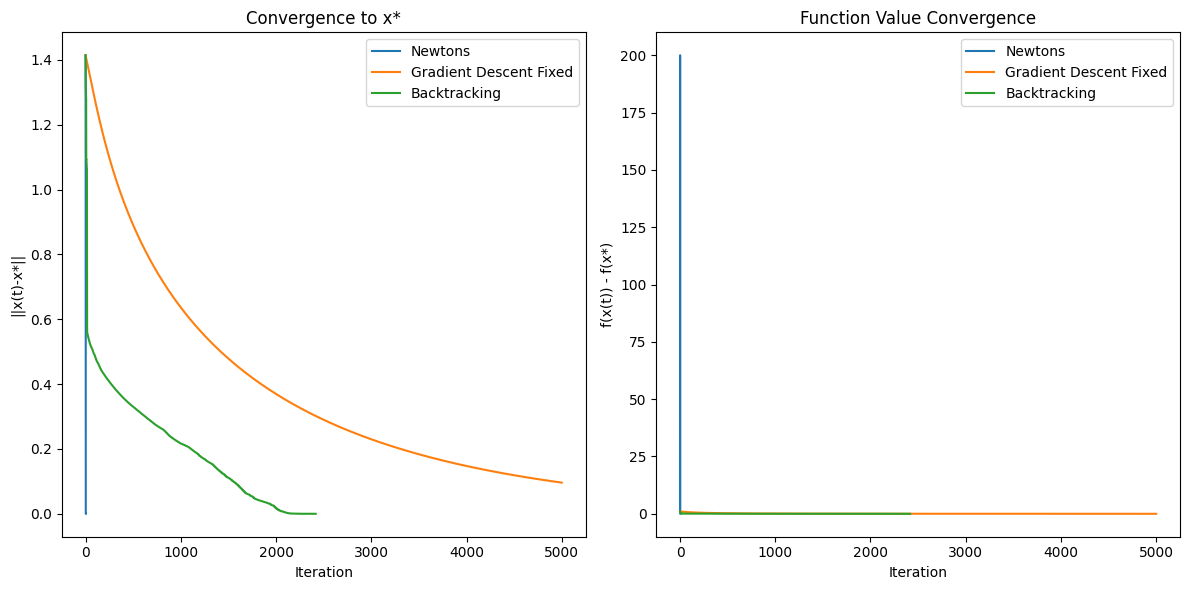

In [123]:
def f(x):
    x_1 = x[0]
    x_2 = x[1]
    return 200 * (x_2 - (x_1 ** 2)) ** 2 + (1 - x_1) ** 2

def grad_f(x):
    x_1, x_2 = x
    return np.array([800 * x_1**3 - 800 * x_1 * x_2 + 2 * x_1 - 2, -400 * x_1**2 + 400 * x_2])

def hessian_f(x):
    x_1 = x[0]
    x_2 = x[1]
    return np.array ([[2400 * x_1**2 - 800 * x_2 + 2, -800 * x_1], [-800 * x_1, 400]])

def newtons_method(x0, tol=1e-6, max_iter=5000):
    x = x0
    trajectory = [x]
    for _ in range(max_iter):
        grad = grad_f(x)
        H = hessian_f(x)
        x = x - np.linalg.inv(hessian_f(x)).dot(grad_f(x))
        trajectory.append(x)
        if np.linalg.norm(grad) < tol:
            break
    return trajectory

def gradient_descent_backtracking(x0, beta=0.5, gamma=0.5, tol=1e-6, max_iter=5000):
    x = x0
    trajectory = [x]
    for _ in range(max_iter):
        grad = grad_f(x)
        mu = 1.0
        while f(x - mu*grad) > f(x) - gamma*mu*np.linalg.norm(grad)**2:
            mu *= beta
        x = x - mu * grad
        trajectory.append(x)
        if np.linalg.norm(grad) < tol:
            break
    return trajectory

def gradient_descent_fixed(x0, mu = 1e-3, tol=1e-6, max_iter=5000):
    x = x0
    trajectory = [x]
    for _ in range(max_iter):
        grad = grad_f(x)
        x = x - mu * grad
        trajectory.append(x)
        if np.linalg.norm(grad) < tol:
            break
    return trajectory



x0 = np.array([0.0,0.0])

trajectory_gd_fixed = gradient_descent_fixed(x0)
trajectory_newtons = newtons_method(x0)
trajectory_gd_backtracking = gradient_descent_backtracking(x0)

x_star = np.array([1.0,1.0])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot([np.linalg.norm(x - x_star) for x in trajectory_newtons], label = "Newtons")
plt.plot([np.linalg.norm(x - x_star) for x in trajectory_gd_fixed], label = "Gradient Descent Fixed")
plt.plot([np.linalg.norm(x - x_star) for x in trajectory_gd_backtracking], label = "Backtracking")
plt.xlabel('Iteration')
plt.ylabel('||x(t)-x*||')
plt.title('Convergence to x*')
plt.legend()

plt.subplot(1,2,2)
plt.plot([f(x) - f(x_star) for x in trajectory_newtons], label="Newtons")
plt.plot([f(x) - f(x_star) for x in trajectory_gd_fixed], label="Gradient Descent Fixed")
plt.plot([f(x) - f(x_star) for x in trajectory_gd_backtracking], label="Backtracking")
plt.xlabel('Iteration')
plt.ylabel('f(x(t)) - f(x*)')
plt.title('Function Value Convergence')
plt.legend()

plt.tight_layout()
plt.show()
